$$
\newcommand{\Bin}{\operatorname{Bin}}
\newcommand{\Var}{\operatorname{Var}}
\newcommand{\Cov}{\operatorname{Cov}}
\newcommand{\Cor}{\operatorname{Cor}}
\newcommand{\E}{\operatorname{E}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\tr}{\operatorname{tr}}
$$

What we know about $\tau$:
$$
\begin{align}
\rho_g & =
\frac{
 \tau \left( 
  S^{\left(1\right)}_{TA}, S^{\left(2\right)}_{TA}
 \right)
} {
 \tau \left(
  S^{\left(1\right)}_{TT}, S^{\left(2\right)}_{TT}
 \right)
} \rho_b \\
\tau \left(
 S^{\left(1\right)}, S^{\left(2\right)}
\right) & =
\frac{
 \tr \left(
  S^{\left(1\right)T} S^{\left(2\right)}
 \right)
}{
 \sqrt{
  \tr \left(
   S^{\left(1\right)T} S^{\left(1\right)}
  \right)
  \tr \left(
   S^{\left(2\right)T} S^{\left(2\right)}
  \right)
 }
} \\
& =
\frac{
 \sum_{i,j}{
  S^{\left(1\right)}_{ij} S^{\left(2\right)}_{ij}
 }
}{
 \sqrt{
  \sum_{i,j}{
   S^{\left(1\right)}_{ij} S^{\left(1\right)}_{ij}
  }
  \sum_{i,j}{
   S^{\left(2\right)}_{ij} S^{\left(2\right)}_{ij}
  }
 }
} \\
\end{align}
$$

Our goal is to make a function for $\tau \left(
 \Sigma^{*\left(1\right)}, \Sigma^{*\left(2\right)}
\right)$ that avoids doing expensive recomputations. Since $\lambda$ affects only the diagonal, I think we can do this.

$$
\begin{align}
\tau \left(
 \Sigma^{*\left(1\right)}, \Sigma^{*\left(2\right)}
\right) & =
\frac{
 \sum_{i,j}{
  \Sigma^{*\left(1\right)}_{ij} \Sigma^{*\left(2\right)}_{ij}
 }
}{
 \sqrt{
  \sum_{i,j}{
   \Sigma^{*\left(1\right)}_{ij} \Sigma^{*\left(1\right)}_{ij}
  }
  \sum_{i,j}{
   \Sigma^{*\left(2\right)}_{ij} \Sigma^{*\left(2\right)}_{ij}
  }
 }
} \\
& = \frac{
 \sum_{i \ne j}{
  \Sigma^{\left(1\right)}_{ij} \Sigma^{\left(2\right)}_{ij}
 } + M \left[ 1 + \lambda \right]^2
}{
 \sqrt{
  \left\{
  \sum_{i \ne j}{
   \Sigma^{\left(1\right)}_{ij} \Sigma^{\left(1\right)}_{ij}
  } + M \left[ 1 + \lambda \right]^2
  \right\}
  \left\{
  \sum_{i \ne j}{
   \Sigma^{\left(2\right)}_{ij} \Sigma^{\left(2\right)}_{ij}
  } + M \left[ 1 + \lambda \right]^2
  \right\} }
} \\
& = \frac{
 \sum_{i \ne j}{
  \Sigma^{\left(1\right)}_{ij} \Sigma^{\left(2\right)}_{ij}
 } + M \gamma^2
}{
 \sqrt{
  \left\{
  \sum_{i \ne j}{
   \Sigma^{\left(1\right)}_{ij} \Sigma^{\left(1\right)}_{ij}
  } + M \gamma^2
  \right\}
  \left\{
  \sum_{i \ne j}{
   \Sigma^{\left(2\right)}_{ij} \Sigma^{\left(2\right)}_{ij}
  } + M \gamma^2
  \right\} }
} & \gamma & := \lambda + 1\\
\end{align}
$$

The above shows that we only need to calculate the off-diagonal sum of products once, and we can make a nice plot from there.

In [1]:
%run library.ipynb

In [2]:
pops = ['eas', 'eur']
Sigmas = np.array([ fromfile_tril('../common/ld/22.{}.ld.bin'.format(pop)) for pop in pops ])

In [3]:
M = Sigmas[0].shape[0]

In [4]:
Sigmas[:, range(M), range(M)] = 0

In [6]:
def tau(S, gammas):
    M = min(S[0].shape)
    
    # square and cross terms
    cr = (S[0] * S[1]).sum()
    sq  = (S**2).sum(axis=1).sum(axis=1)

    # numerator and denominator
    num = cr + M*(gammas**2)
    den = np.sqrt((sq[:,None] + (M*(gammas**2))[None,:]).prod(axis=0))

    return(num / den)

In [7]:
Mt = 500
typeds = [ nr.choice(M, Mt, replace=False) for i in range(10) ]

In [8]:
ratios = [ tau(Sigmas[:,typed], gammas) / tau(Sigmas[:,typed[:,None],typed], gammas) for typed in typeds ]

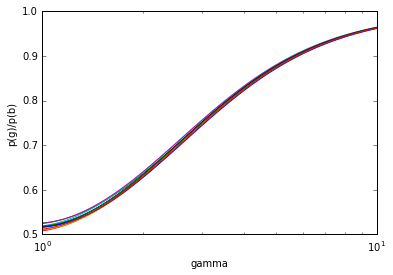

In [9]:
for ratio in ratios:
    plt.plot(gammas, ratio)
plt.semilogx()
plt.ylabel('p(g)/p(b)')
plt.xlabel('gamma')
plt.show()

C:\Users\kgali\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


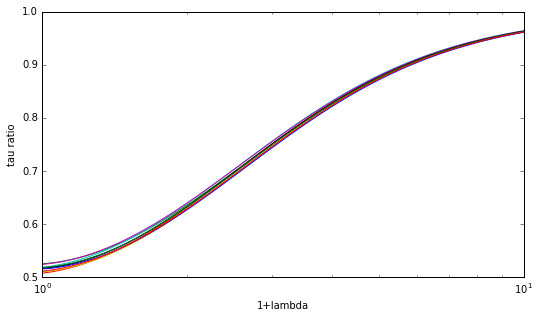

In [18]:
gammas = np.logspace(0, 1, 100)
ratios = [ tau(Sigmas[:,typed], gammas) / tau(Sigmas[:,typed[:,None],typed], gammas) for typed in typeds ]

fig = plt.figure(figsize=(8.63,4.76))
ax = fig.add_subplot(1,1,1)

for ratio in ratios:
    ax.plot(gammas, ratio)
ax.semilogx()
ax.set_ylabel('tau ratio')
ax.set_xlabel('1+lambda')

fig.show()

C:\Users\kgali\Miniconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


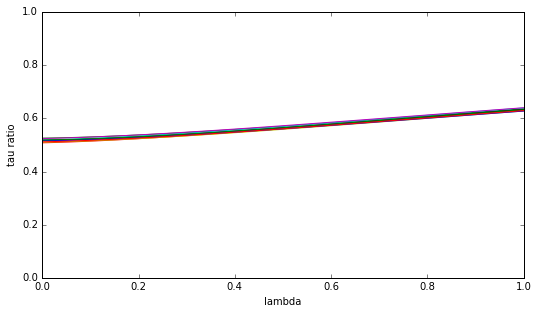

In [19]:
gammas = np.linspace(1,2,101)
ratios = [ tau(Sigmas[:,typed], gammas) / tau(Sigmas[:,typed[:,None],typed], gammas) for typed in typeds ]
fig = plt.figure(figsize=(8.63,4.76))
ax = fig.add_subplot(1,1,1)

for ratio in ratios:
    ax.plot(gammas-1, ratio)
ax.set_ylabel('tau ratio')
ax.set_xlabel('lambda')
ax.set_ylim(0,1)

fig.show()